# Machine Learning Project Walkthrough with Python

In this article, I will take you through a complete Machine Learning Project Walkthrough with Python programming language. This complete machine learning project walkthrough includes the implementation of algorithms provided by Scikit-Learn which is one of the best Python libraries for Machine Learning.

#### Below are the steps that are covered in this Machine Learning project walkthrough

In [82]:
#1 Importing the Data
#2 Data Visualization
#3 Data Cleaning and Transformation
#4 Encoding the Data
#5 Splitting the data into Training and Test sets
#6 Fine Tuning Algorithms
#7 Cross Validate with KFold
#8 Prediction on the test set

Now in this section, I will take you through a complete Machine Learning project walkthrough with Python programming language. I will start by importing the necessary Python libraries and the dataset

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [84]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')

Now let’s see how to visualize this data. Data visualization is crucial to recognize the underlying patterns to properly train the machine learning model

In [85]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


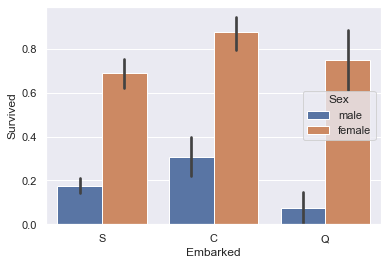

In [86]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train)
sns.set(rc={'figure.figsize': (10, 8)})
plt.show()

## Data Cleaning and Transformation

Now the next step is to clean and transform data according to the output that we need. Here are the steps that I will consider in this step

###### To avoid overfitting, I’m going to group people into logical human age groups.
###### Each booth begins with a letter. I bet this letter is much larger than the number that follows, let’s cut it off.
###### The tariff is another continuous value that should be simplified.
###### Extract the information from the “Name” function. Rather than using the full name, I extracted the last name and name prefix (Mr, Mrs etc.) and then added them as characteristics.
###### Finally, we need to remove unnecessary features.

In [87]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager',
                   'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df


def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df


def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile',
                   '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df


def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df


def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)


def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df


data_train = transform_features(data_train)
data_test = transform_features(data_test)

# Encoding Features

The next step is to standardize the labels. The Label encoder converts each unique string into a number, making the data more flexible that can be used for various algorithms. The result is a scary array of numbers for humans, but beautiful for machines

In [88]:
from sklearn import preprocessing


def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test


data_train, data_test = encode_features(data_train, data_test)

Now the next step is to divide the data into training and testing sets. Here I’ll be using one variable to store all the features minus the value we want to predict, and the other variable to store only the value we want to predict

For this task, I’m going to randomly mix this data into four variables. In this case, I train 80% of the data, then I test the remaining 20%

In [89]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

# Fitting and Tuning Machine Learning Algorithm

Now is the time to determine which algorithm will provide the best model. In this task, I am going with the RandomForestClassifier, but you can also use any other classifier here, such as Support Vector Machines or Naive Bayes

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier.
clf = RandomForestClassifier()

In [91]:
# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt', 'auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
              }

In [92]:
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

In [93]:
# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

In [94]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

In [95]:
# Fit the best algorithm to the data.
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=5,
                       n_estimators=9)

In [96]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8324022346368715


Now we need to use KFold cross-validation to validate our machine learning model. KFold cross-validation helps to understand that is our model good? This makes it possible to verify the efficiency of the algorithm using KFold. This will divide our data into 10 compartments, then run the algorithm using a different compartment as the test set for each iteration

In [97]:
from sklearn.model_selection import KFold


def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome))

# Testing the Model

Now we need to predict on the actual test data

In [98]:
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop('PassengerId', axis=1))
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


I hope you liked this article on a complete machine learning project walkthrough for beginners. Feel free to ask your valuable questions in the comments section below

# Sheikh Rasel Ahmed

##### Data Science || Machine Learning || Deep Learning || Artificial Intelligence Enthusiast

##### LinkedIn - https://www.linkedin.com/in/shekhnirob1

##### GitHub - https://github.com/Rasel1435

##### Behance - https://www.behance.net/Shekhrasel2513